In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
import pandas as pd
%matplotlib inline

In [2]:
dataset = load_iris()

In [3]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### Covert Data into Dataframe

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Add target column

In [5]:
df['target'] = dataset.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Add Flower column

In [7]:
df['flower_name'] = df.target.apply(lambda x : dataset.target_names[x])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Split Train and Test Data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data = df.drop(['target', 'flower_name'], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
target = df['target']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [13]:
len(X_train)

120

In [14]:
len(X_test)

30

### Train Model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.score(X_test, y_test)

0.9333333333333333

In [27]:
y_predicted = model.predict(X_test)

In [28]:
np.array(y_test[:5])

array([0, 2, 0, 2, 2])

In [29]:
y_predicted[:5]

array([0, 2, 0, 2, 2])

In [21]:
flowers = ['setosa', 'versicolor', 'virginica']

### Confusion Matrix & Classification Report

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 11]], dtype=int64)

Text(51.0, 0.5, 'Truth')

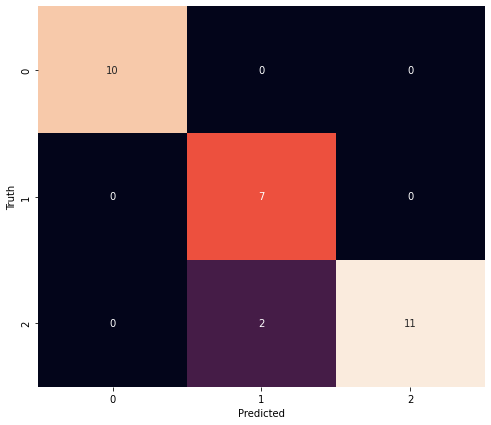

In [34]:
plt.figure(figsize=(8,7))
sn.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

